<a href="https://colab.research.google.com/github/chalsai/anomaly-detection/blob/main/Anomalies_with_Python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

The dataset provided is appropriate and relevant to the research question.

## <font color='#2F4F4F'>2. Data Cleaning & Preparation</font>

In [ ]:
# load libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

# to display all columns
pd.set_option('display.max.columns', None)

# to display the entire contents of a cell
pd.set_option('display.max_colwidth', None)

In [ ]:
# load and preview dataset
df = pd.read_csv('anomalies1.csv')
df.sample(3)

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (3,7,8,106,147,163) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,cdr_id,cdr_sub_id,cdr_type,src_rec_line_no,src_cdr_id,src_cdr_no,status,re_rating_times,create_date,start_date,end_date,cust_local_start_date,cust_local_end_date,std_evt_type_id,evt_source_category,obj_type,obj_id,owner_cust_id,default_acct_id,bill_cycle_id,service_category,usage_service_type,result_code,result_reason,be_id,hot_seq,cp_id,usage_measure_id,actual_usage,rate_usage,service_unit_type,usage_measure_id_1,actual_usage_1,rate_usage_1,service_unit_type_1,debit_amount,reserved,debit_from_prepaid,debit_from_advance_prepaid,debit_from_postpaid,debit_from_advance_postpaid,debit_from_credit_postpaid,total_tax,free_unit_amount_of_times,free_unit_amount_of_duration,free_unit_amount_of_flux,acct_id_bal_1,acct_balance_id_bal_1,balance_type_bal_1,cur_balance_bal_1,chg_balance_bal_1,currency_id_bal_1,oper_type_bal_1,fu_own_type_fu_1,fu_own_id_fu_1,free_unit_id_fu_1,free_unit_type_fu_1,cur_amount_fu_1,chg_amount_fu_1,fu_measure_id_fu_1,oper_type_fu_1,acct_id_bonus_1,acct_balance_id_bonus_1,balance_type_bonus_1,bonus_amount_bonus_1,current_balance_bonus_1,currency_id_bonus_1,oper_type_bonus_1,called_party_number_hash_pii,calling_party_number_hash_pii,service_flow,callforward_indicator,timestamp_of_ssp,time_zone_of_ssp,bearer_capability,charging_time,wait_duration,termination_reason,call_reference_number,access_prefix,routing_prefix,redirecting_party_id,brand_id,main_offering_id,charge_party_indicator,pay_type,charging_type,call_type,roam_state,calling_home_country_code,calling_home_area_number,calling_home_network_code,calling_roam_country_code,calling_roam_area_number,calling_roam_network_code,called_home_country_code,called_home_area_number,called_home_network_code,called_roam_country_code,called_roam_area_number,called_roam_network_code,service_type,hot_line_indicator,home_zone_id,special_zone_id,np_flag,np_prefix,calling_cug_no,called_cug_no,oppose_number_type,calling_network_type,called_network_type,calling_vpn_top_group_number,calling_vpn_group_number,calling_vpn_short_number,called_vpn_top_group_number,called_vpn_group_number,called_vpn_short_number,group_call_type,online_charging_flag,start_time_of_billcycle,last_effect_offering,dt_discount,oppose_main_offering_id,main_balance_info,chg_balance_info,chg_freeunit_info,user_state,group_pay_flag,roaming_zone_id,primary_offer_chg_amt,originating_ioi,terminating_ioi,ims_charging_identifier,reserved_1,recepient_cp_id,amt_before_disc,dds_disc_amt,peak_flag,country_name,release_cause,voice_session_id,call_completion_flag,pay_obj_type,pay_obj_id,pay_owner_cust_id,pay_default_acct_id,pay_pri_identity,pay_bill_cycle_id,pay_paytype,tax1,tax2,prepaid_balance,postpaid_balance,start_country_group,end_country_group,user_group_id,cug_member_amt,charge_amt_bf_disc,preferareacellid,usage_service_type_1,business_type,pay_default_acct_key,pay_subscriber_key,bonusvalidity1,discount_of_last_eff_product,free_unit_chg_times,free_unit_chg_duration,debit_from_prepaid_1,debit_from_postpaid_1,charge_of_fund
42595,736100074623192576,0,N,0,0,736100074623192576,A,0,20220409051204,20220409051048,20220409051201,20220409081048,20220409081201,11000,D,S,142913000218111037,142913000218111036,142913000218111040,20220401,1,10,0,2,101,0,14291,1003,73,73,1,0,0,0,0,59276,0,59276,59276,0,0,0,0,0,0,0,142913000218111040,7.360000e+17,2000,152034,59276,1074.0,0.0,NaN,NaN,NaN,0,0,0,NaN,NaN,0,NaN,0,0,0,NaN,NaN,47abac745383330c52ad53a74b9d8c06b1a548f9f3ab5aca248d817f44fac431,530d58164b79cd2355b454d70f418fa93346d3589c6b09437f59be4c1657468a,1,0.0,2.022040e+13,12.0,0.0,2.022041e+13,0.0,1.0,7BA3DA2BEE,NaN,NaN,NaN,1.0,150200.0,1,0.0,0.0,0.0,0.0,254.0,1.0,1.0,254.0,1.0,1.0,254.0,1.0,1.0,254.0,1.0,1.0,C_VOICE,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,2.022033e+13,150200.0,-1.0,0.0,NaN,NaN,NaN,1000000.0,0.0,NaN,59276.0,NaN,NaN,NaN,0.0,0.0,0.0,0.0,1.0,Kenya,16.0,ocg2;1649481035;69485293;3,0.0,0,0.0,0.0,0.0,NaN,NaN,0.0,0.0,0.0,152034.0,0.0,200001.0,200001.0,1.0,0.0,59276.0,NaN,1110.0,0.0,NaN,NaN,2.037010e

In [ ]:
# check dataset shape
df.shape

(65091, 171)

Our dataset has 65,091 records and 171 variables.

In [ ]:
# check for duplicates
df.duplicated().sum()

14

14 duplicated records are found. We will drop them.

In [ ]:
#Drop dublicate records
df = df.drop_duplicates()
df.shape

(65077, 171)

In [ ]:
# check for missing values
df.isna().sum()

cdr_id                    0
cdr_sub_id                0
cdr_type                  0
src_rec_line_no           0
src_cdr_id                0
                         ..
free_unit_chg_times       1
free_unit_chg_duration    1
debit_from_prepaid_1      1
debit_from_postpaid_1     1
charge_of_fund            1
Length: 171, dtype: int64

In [ ]:
#drop missing value
print(df.dropna())

Empty DataFrame
Columns: [cdr_id, cdr_sub_id, cdr_type, src_rec_line_no, src_cdr_id, src_cdr_no, status, re_rating_times, create_date, start_date, end_date, cust_local_start_date, cust_local_end_date, std_evt_type_id, evt_source_category, obj_type, obj_id, owner_cust_id, default_acct_id, bill_cycle_id, service_category, usage_service_type, result_code, result_reason, be_id, hot_seq, cp_id, usage_measure_id, actual_usage, rate_usage, service_unit_type, usage_measure_id_1, actual_usage_1, rate_usage_1, service_unit_type_1, debit_amount, reserved, debit_from_prepaid, debit_from_advance_prepaid, debit_from_postpaid, debit_from_advance_postpaid, debit_from_credit_postpaid, total_tax, free_unit_amount_of_times, free_unit_amount_of_duration, free_unit_amount_of_flux, acct_id_bal_1, acct_balance_id_bal_1, balance_type_bal_1, cur_balance_bal_1, chg_balance_bal_1, currency_id_bal_1, oper_type_bal_1, fu_own_type_fu_1, fu_own_id_fu_1, free_unit_id_fu_1, free_unit_type_fu_1, cur_amount_fu_1, chg_am

We will drop cdr_id','cdr_sub_id','cdr_type','src_cdr_id','src_rec_line_no since we have no need of them and they would interfere with our analysis.

In [ ]:
df.drop(columns = ['cdr_id','cdr_sub_id','cdr_type','src_cdr_id','src_rec_line_no'], inplace = True)

In [ ]:
# preview variable datatypes
df.dtypes

src_cdr_no                  int64
status                     object
re_rating_times            object
create_date                object
start_date                  int64
                           ...   
free_unit_chg_times       float64
free_unit_chg_duration    float64
debit_from_prepaid_1      float64
debit_from_postpaid_1     float64
charge_of_fund            float64
Length: 166, dtype: object

No missing values found. We will look at the unique values in each variable just to be safe.

In [ ]:
columns = df.columns

for col in columns:
    print("Variable:", col)
    print("Number of unique values:", df[col].nunique())
    print(df[col].unique())
    print()

Variable: src_cdr_no
Number of unique values: 64900
[735100076388104235 735100076388104236 730100088262367629 ...
 731100084888343956 731100084888412072 736100074623581714]

Variable: status
Number of unique values: 3
['A' 'X' '2']

Variable: re_rating_times
Number of unique values: 3
[0 '0' 'P']

Variable: create_date
Number of unique values: 2188
[20220409050355 20220409050359 20220409050425 ... 20220409052520
 20220409052624 20220409052603]

Variable: start_date
Number of unique values: 1781
[20220409050117 20220409045528 20220409050407 ... 20220409052418
 20220409052403 20220409052425]

Variable: end_date
Number of unique values: 1430
[20220409050352 20220409050356 20220409050423 ... 20220409052517
 20220409052621 20220409052600]

Variable: cust_local_start_date
Number of unique values: 1790
[20220409080517 20220409075528 20220409080407 ... 20220409082418
 20220409082403 20220409082425]

Variable: cust_local_end_date
Number of unique values: 1430
[20220409080352 20220409080356 2022

We can confirm that there are no missing values in this dataset.

An anomaly has been noted: there appears to be duplicated columns between 'end_date' and 'cust_local_end_date'

Let's preview them:

In [ ]:
# previewing the possibly duplicated columns
df[['cust_local_end_date', 'cust_local_end_date']]

,cust_local_end_date,cust_local_end_date
0,20220409080352,20220409080352
1,20220409080356,20220409080356
2,20220409080423,20220409080423
3,20220409080429,20220409080429
4,20220409080435,20220409080435
...,...,...
65086,20220409082013,20220409082013
65087,20220409082019,20220409082019
65088,20220409082109,20220409082109
65089,20220409082309,20220409082309


The last two columns appear to be complete copies of the first two. We will confirm this so that we do not blindly drop them.

In [ ]:
df = df.drop(columns = ['cust_local_end_date', 'cust_local_end_date'])
df.shape

(65077, 165)

Another anomaly noted is that where there are records of 'actual_usage', 'rate_usage'

In [ ]:
df = df.drop(columns = ['actual_usage', 'actual_usage'])
df.shape

(65077, 164)

In [ ]:
df.dtypes

src_cdr_no                  int64
status                     object
re_rating_times            object
create_date                object
start_date                  int64
                           ...   
free_unit_chg_times       float64
free_unit_chg_duration    float64
debit_from_prepaid_1      float64
debit_from_postpaid_1     float64
charge_of_fund            float64
Length: 164, dtype: object

We now save our clean dataset to a new CSV file.

## <font color='#2F4F4F'>3. Data Analysis</font>

### 3.1 Univariate Analysis

In [ ]:
# get the summary statistics
df.describe()

,src_cdr_no,start_date,end_date,cust_local_start_date,std_evt_type_id,obj_id,owner_cust_id,default_acct_id,bill_cycle_id,service_category,usage_service_type,result_code,result_reason,be_id,hot_seq,cp_id,usage_measure_id,rate_usage,service_unit_type,usage_measure_id_1,actual_usage_1,rate_usage_1,service_unit_type_1,debit_amount,reserved,debit_from_prepaid,debit_from_advance_prepaid,debit_from_postpaid,debit_from_advance_postpaid,debit_from_credit_postpaid,total_tax,free_unit_amount_of_times,free_unit_amount_of_duration,free_unit_amount_of_flux,acct_id_bal_1,acct_balance_id_bal_1,balance_type_bal_1,cur_balance_bal_1,chg_balance_bal_1,currency_id_bal_1,oper_type_bal_1,fu_own_id_fu_1,free_unit_id_fu_1,free_unit_type_fu_1,cur_amount_fu_1,chg_amount_fu_1,fu_measure_id_fu_1,oper_type_fu_1,acct_id_bonus_1,acct_balance_id_bonus_1,balance_type_bonus_1,bonus_amount_bonus_1,current_balance_bonus_1,currency_id_bonus_1,oper_type_bonus_1,service_flow,callforward_indicator,timestamp_of_ssp,time_zone_of_ssp,bearer_capability,charging_time,wait_duration,termination_reason,routing_prefix,redirecting_party_id,brand_id,main_offering_id,pay_type,charging_type,call_type,roam_state,calling_home_country_code,calling_home_area_number,calling_home_network_code,calling_roam_country_code,calling_roam_area_number,calling_roam_network_code,called_home_country_code,called_home_area_number,called_home_network_code,called_roam_country_code,called_roam_area_number,called_roam_network_code,hot_line_indicator,home_zone_id,special_zone_id,np_flag,calling_cug_no,called_cug_no,oppose_number_type,calling_network_type,called_network_type,calling_vpn_top_group_number,calling_vpn_group_number,calling_vpn_short_number,called_vpn_top_group_number,called_vpn_group_number,called_vpn_short_number,group_call_type,online_charging_flag,start_time_of_billcycle,last_effect_offering,dt_discount,oppose_main_offering_id,main_balance_info,chg_balance_info,chg_freeunit_info,user_state,group_pay_flag,roaming_zone_id,primary_offer_chg_amt,originating_ioi,terminating_ioi,ims_charging_identifier,reserved_1,recepient_cp_id,amt_before_disc,dds_disc_amt,peak_flag,release_cause,call_completion_flag,pay_obj_id,pay_owner_cust_id,pay_default_acct_id,pay_bill_cycle_id,pay_paytype,tax1,tax2,prepaid_balance,postpaid_balance,start_country_group,end_country_group,user_group_id,cug_member_amt,charge_amt_bf_disc,preferareacellid,usage_service_type_1,business_type,bonusvalidity1,discount_of_last_eff_product,free_unit_chg_times,free_unit_chg_duration,debit_from_prepaid_1,debit_from_postpaid_1,charge_of_fund
count,6.507700e+04,6.507700e+04,6.507700e+04,6.507700e+04,65077.000000,6.507700e+04,6.507700e+04,6.507700e+04,6.507700e+04,65077.0,65077.000000,65077.0,65077.000000,65077.000000,65077.0,65077.000000,65077.0,65077.000000,65077.0,65077.0,65077.0,65077.0,65077.0,6.507700e+04,65077.000000,6.507700e+04,6.507700e+04,6.507700e+04,65077.0,65077.000000,65077.000000,65077.0,65077.000000,65077.0,6.507700e+04,5.123600e+04,6.507700e+04,6.507700e+04,6.507700e+04,51236.0,51236.000000,1.127100e+04,1.127100e+04,65077.000000,6.507700e+04,65077.000000,11271.0,11271.0,65077.0,0.0,65077.0,65077.0,65077.0,0.0,0.0,65077.000000,65076.000000,6.507600e+04,65076.000000,65076.0,6.507600e+04,65076.0,65076.000000,0.0,3.500000e+01,65076.000000,6.507600e+04,65076.000000,65076.0,65076.000000,65076.000000,65076.000000,65076.000000,65076.000000,65076.000000,65076.000000,65076.000000,65076.000000,65076.000000,65076.000000,65076.000000,65076.000000,65076.000000,65076.000000,65076.0,65076.0,65076.000000,6.507600e+04,6.507600e+04,65076.0,65076.0,65076.0,0.0,0.0,0.0,0.0,0.0,0.0,65076.0,65076.0,6.507600e+04,6.507600e+04,65076.0,65076.0,0.0,0.0,0.0,6.507600e+04,65076.000000,0.0,6.507600e+04,0.0,0.0,0.0,65076.0,65076.0,65076.0,65076.0,65076.000000,65076.000000,65076.0,6.507600e+04,6.507600e+04,6.507600e+04,186.0,65076.000000,65076.000000,65076.000000,6.507600e+04,6.507600e+04,65076.000000,65076.000000,65076.000000,65076.000000,6.507600e+04,0.0

10    59553
11     5227
15      155
13      142
Name: usage_service_type, dtype: int64


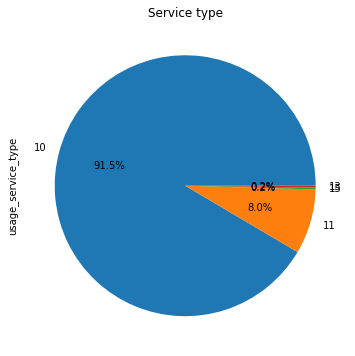

In [ ]:
print(df.usage_service_type.value_counts())

plt.figure(figsize = (6, 6))
df.usage_service_type.value_counts().plot(kind = 'pie', autopct = '%1.1f%%')
plt.title('Service type')
plt.show()

150200.0      53273
2073729.0      7547
201002.0       3306
2084650.0       634
201004.0        140
201020.0         80
201017.0         33
20191010.0       26
20191011.0       16
878420.0          8
872617.0          6
201091.0          3
201015.0          1
20191012.0        1
150030.0          1
151209.0          1
Name: main_offering_id, dtype: int64


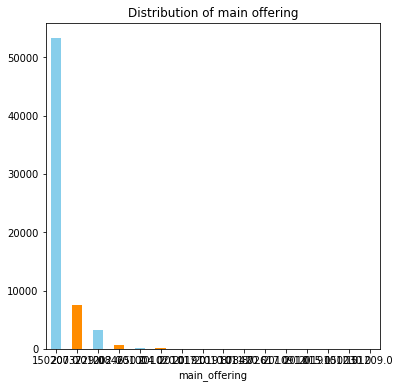

In [ ]:
print(df.main_offering_id.value_counts())

plt.figure(figsize = (6, 6))
df.main_offering_id.value_counts().plot(kind = 'bar', rot = 0, color = ['skyblue', 'darkorange'])
plt.title('Distribution of main offering')
plt.xlabel('main_offering')
plt.show()

150200.0      53273
2073729.0      7547
201002.0       3306
2084650.0       634
201004.0        140
201020.0         80
201017.0         33
20191010.0       26
20191011.0       16
878420.0          8
872617.0          6
201091.0          3
201015.0          1
20191012.0        1
150030.0          1
151209.0          1
Name: main_offering_id, dtype: int64


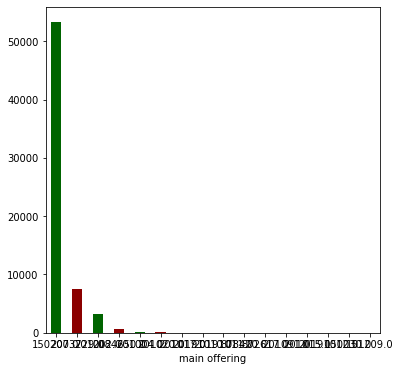

In [ ]:
print(df.main_offering_id.value_counts())

plt.figure(figsize = (6, 6))
df.main_offering_id.value_counts().plot(kind ='bar', rot = 0, color = ['darkgreen', 'darkred'])
plt.xlabel("main offering")
plt.show()

Majority of the customers in this dataset have not churned, thereby making this dataset very biased.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


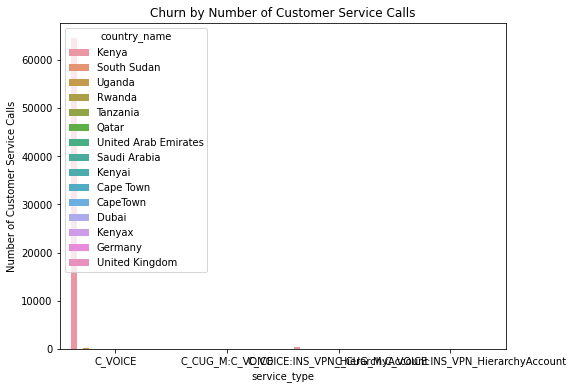

In [ ]:
# churn by number of customer service calls
plt.figure(figsize = (8, 6))
churn_area_code = sns.countplot('service_type', hue = 'country_name', data = df)
churn_area_code.set(title = "Churn by Number of Customer Service Calls",
                    ylabel = 'Number of Customer Service Calls')
plt.show()